In [61]:
# pip install langdetect

### Loading the Libraries

In [1]:
import os
import json
import requests

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import time

In [4]:
import string

In [5]:
import pandas as pd

In [6]:
import matplotlib.pyplot as plt

In [7]:
import bson.json_util as json_util

In [8]:
from dotenv import load_dotenv

In [9]:
from pandas.io.json import json_normalize

In [10]:
from datetime import datetime

In [11]:
from langdetect import detect

##### nltk essentials

In [40]:
import nltk

In [34]:
# for text normalize
from nltk import word_tokenize
from nltk.corpus import stopwords

In [35]:
# for analysis
from nltk.collocations import *

### Global variables

In [12]:
path = os.path.expanduser("../data/")

load_dotenv(os.path.join(path, ".env"))

True

In [13]:
# environment variables
USER = os.getenv("GIT_USERNAME")

KEY = os.getenv("GIT_PASSWORD")

ID = os.getenv("GIT_CLIENT_ID")

SECRET = os.getenv("GIT_CLIENT_SECRET")

ACCESS = os.getenv("GIT_ACCESS_TOKEN")

In [14]:
# all url's
SEARCH_URL = "https://github.com/search" 

note = "my test application"

MAIN = "https://github.com"

## Functions

In [113]:
## a function to paginate through github repos
def search_repo_paging(qry):
    url = "https://api.github.com/search/repositories"
    pms = {"q":qry, "sort":"forks", "order":"desc", "per_page":100}
    while True:
        res = requests.get(url, params=pms)
        result = res.json()
        print(f"Connection status:{res}")
        results.extend(result["items"])
        print(f"Just download: {len(result['items'])}, Total:{len(results)}")
        params = {}
        
        try:
            url = res.links["next"]["url"]
        except:
            break
            
        time.sleep(10)

In [117]:
# a function to normalize the data
def df_from_data(data):
    sanitized = json.loads(json_util.dumps(results))
    normalized = json_normalize(sanitized)
    return pd.DataFrame(normalized)

In [19]:
# a func to detect language of string
def detect_lang(st):
    try:
        return detect(st)
    except:
        return None

In [32]:
## text normalization 
def clean_text(text=" ", stopwords = []):
    punc = list(string.punctuation)
    
    tokens = word_tokenize(text.strip())
    clean = [wrd.lower() for wrd in tokens]
    clean = [wrd for wrd in clean if wrd not in stopwords]
    clean = [wrd.strip("".join(punc)) for wrd in clean if wrd not in punc]
    
    return " ".join(clean)

In [102]:
# clean_text(new_df["description"].to_list()[0])

### API

In [18]:
## requesting all available Url's
res = requests.get("https://api.github.com/")

In [19]:
URL = res.json()
AUTH_URL = URL["authorizations_url"]
AUTH_URL

'https://api.github.com/authorizations'

In [114]:
## paginating github data
# results of 19
results=[]
search_repo_paging("created:2019-01-01..2019-12-31")

Connection status:<Response [200]>
Just download: 100, Total:100
Connection status:<Response [200]>
Just download: 100, Total:200
Connection status:<Response [200]>
Just download: 100, Total:300
Connection status:<Response [200]>
Just download: 100, Total:400
Connection status:<Response [200]>
Just download: 100, Total:500
Connection status:<Response [200]>
Just download: 100, Total:600
Connection status:<Response [200]>
Just download: 100, Total:700
Connection status:<Response [200]>
Just download: 100, Total:800
Connection status:<Response [200]>
Just download: 100, Total:900
Connection status:<Response [200]>
Just download: 100, Total:1000


In [116]:
results[0]["created_at"]

'2019-03-26T07:31:14Z'

In [121]:
# results of year 2020
results= []
search_repo_paging("created:>2020-01-01")

Connection status:<Response [200]>
Just download: 100, Total:100
Connection status:<Response [200]>
Just download: 100, Total:200
Connection status:<Response [200]>
Just download: 100, Total:300
Connection status:<Response [200]>
Just download: 100, Total:400
Connection status:<Response [200]>
Just download: 100, Total:500
Connection status:<Response [200]>
Just download: 100, Total:600
Connection status:<Response [200]>
Just download: 100, Total:700
Connection status:<Response [200]>
Just download: 100, Total:800
Connection status:<Response [200]>
Just download: 100, Total:900
Connection status:<Response [200]>
Just download: 100, Total:1000


## Data Pull

In [120]:
# getting data frame from 2019 data
df19 = df_from_data(results)
df19.head(2)

,id,node_id,name,full_name,private,html_url,description,fork,url,forks_url,...,owner.events_url,owner.received_events_url,owner.type,owner.site_admin,license.key,license.name,license.spdx_id,license.url,license.node_id,license
0,177736533,MDEwOlJlcG9zaXRvcnkxNzc3MzY1MzM=,996.ICU,996icu/996.ICU,False,https://github.com/996icu/996.ICU,Repo for counting stars and contributing. Pres...,False,https://api.github.com/repos/996icu/996.ICU,https://api.github.com/repos/996icu/996.ICU/forks,...,https://api.github.com/users/996icu/events{/pr...,https://api.github.com/users/996icu/received_e...,User,False,other,Other,NOASSERTION,None,MDc6TGljZW5zZTA=,NaN
1,228683419,MDEwOlJlcG9zaXRvcnkyMjg2ODM0MTk=,it-cert-automation-practice,google/it-cert-automation-practice,False,https://github.com/google/it-cert-automation-p...,Google IT Automation with Python Professional ...,False,https://api.github.com/repos/google/it-cert-au...,https://api.github.com/repos/google/it-cert-au...,...,https://api.github.com/users/google/events{/pr...,https://api.github.com/users/google/received_e...,Organization,False,apache-2.0,Apache License 2.0,Apache-2.0,https://api.github.com/licenses/apache-2.0,MDc6TGljZW5zZTI=,NaN


In [122]:
# getting data frame from 2020 data
df20 = df_from_data(results)
df20.head(2)

,id,node_id,name,full_name,private,html_url,description,fork,url,forks_url,...,owner.events_url,owner.received_events_url,owner.type,owner.site_admin,license.key,license.name,license.spdx_id,license.url,license.node_id,license
0,272411321,MDEwOlJlcG9zaXRvcnkyNzI0MTEzMjE=,IBMYes,CCChieh/IBMYes,False,https://github.com/CCChieh/IBMYes,None,False,https://api.github.com/repos/CCChieh/IBMYes,https://api.github.com/repos/CCChieh/IBMYes/forks,...,https://api.github.com/users/CCChieh/events{/p...,https://api.github.com/users/CCChieh/received_...,User,False,apache-2.0,Apache License 2.0,Apache-2.0,https://api.github.com/licenses/apache-2.0,MDc6TGljZW5zZTI=,NaN
1,261787758,MDEwOlJlcG9zaXRvcnkyNjE3ODc3NTg=,design-resources-for-developers,bradtraversy/design-resources-for-developers,False,https://github.com/bradtraversy/design-resourc...,Curated list of design and UI resources from s...,False,https://api.github.com/repos/bradtraversy/desi...,https://api.github.com/repos/bradtraversy/desi...,...,https://api.github.com/users/bradtraversy/even...,https://api.github.com/users/bradtraversy/rece...,User,False,mit,MIT License,MIT,https://api.github.com/licenses/mit,MDc6TGljZW5zZTEz,NaN


In [182]:
col_lst = ["description", "stargazers_count", "watchers_count", "size", "forks", 
           "open_issues_count", "language", "score", "created_at"]

subset19 = df19[col_lst]
subset20 = df20[col_lst]

In [183]:
subset19.head(2)

,description,stargazers_count,watchers_count,size,forks,open_issues_count,language,score,created_at
0,Repo for counting stars and contributing. Pres...,253118,253118,183401,21126,16789,Rust,1.0,2019-03-26T07:31:14Z
1,Google IT Automation with Python Professional ...,252,252,12,13273,9123,Python,1.0,2019-12-17T19:04:12Z


In [184]:
subset20.head(2)

,description,stargazers_count,watchers_count,size,forks,open_issues_count,language,score,created_at
0,None,1773,1773,44692,13100,161,Batchfile,1.0,2020-06-15T10:40:25Z
1,Curated list of design and UI resources from s...,23098,23098,4260,5657,0,None,1.0,2020-05-06T14:40:35Z


In [186]:
## saving the subset
subset19.to_csv("../data/gh19-data.csv")
subset20.to_csv("../data/gh20-data.csv")

In [12]:
## loading the subset-data
subset19 = pd.read_csv("../data/gh19-data.csv", index_col=0)
subset20 = pd.read_csv("../data/gh20-data.csv", index_col=0)

## Data Preprocessing

### Textual Data
- English represents 71% of repositories in 2019 &  76% in 2020
-In 2020,
    - Watchers count varies from o to 23,098. and Forks from 107 to 5,657
    - The first quartile of repos has no open issues while top 25% have more than 32
    - The max no of issues are 1996
-In 2019,
    - Watchers count varies from o to 2,53,118 and Forks from 208 to 21,126
    - The first quartile of repos has no open issues while top 25% have more than 61
    - The max no of issues are 16,789

In [16]:
## dropping all na values
new_df19 = subset19.dropna(subset=["description"])
new_df20 = subset20.dropna(subset=["description"])

In [23]:
## detecting the language 
new_df19["lang"] = new_df19.apply(lambda x:detect_lang(x["description"]), axis=1)
new_df20["lang"] = new_df20.apply(lambda x:detect_lang(x["description"]), axis=1)

In [29]:
print(f"""2020: {round((new_df20['lang'] == 'en').sum()/ len(new_df20['lang'])*100)}
2019: {round((new_df19['lang'] == 'en').sum()/ len(new_df20['lang'])*100)}""")

2020: 71
2019: 76


In [30]:
## selecting only english language
new_df19 = new_df19[new_df19["lang"] == 'en']
new_df20 = new_df20[new_df20["lang"] == 'en']

In [36]:
## cleaning description
new_df19["clean"] = new_df19["description"].apply(str)
new_df19["clean"] = new_df19["clean"].apply(lambda x:clean_text(text=x, stopwords=stopwords.words("english")))

new_df20["clean"] = new_df20["description"].apply(str)
new_df20["clean"] = new_df20["clean"].apply(lambda x:clean_text(text=x, stopwords=stopwords.words("english")))

##### Trends in Numerical Vars

In [37]:
new_df19[["stargazers_count", "watchers_count", "size", "forks", "open_issues_count"]].describe()

,stargazers_count,watchers_count,size,forks,open_issues_count
count,562.000000,562.000000,5.620000e+02,562.000000,562.000000
mean,3011.451957,3011.451957,4.814932e+04,822.019573,113.314947
std,11358.875337,11358.875337,2.236437e+05,1491.904407,820.674416
min,0.000000,0.000000,0.000000e+00,208.000000,0.000000
25%,391.750000,391.750000,7.870000e+02,304.250000,4.250000
50%,1264.500000,1264.500000,4.298000e+03,419.500000,16.000000
75%,2887.250000,2887.250000,2.339950e+04,705.500000,61.000000
max,253118.000000,253118.000000,3.909293e+06,21126.000000,16789.000000


In [38]:
new_df20[["stargazers_count", "watchers_count", "size", "forks", "open_issues_count"]].describe()

,stargazers_count,watchers_count,size,forks,open_issues_count
count,525.000000,525.000000,5.250000e+02,525.000000,525.000000
mean,1181.822857,1181.822857,7.550454e+04,339.487619,43.754286
std,2173.900020,2173.900020,4.070703e+05,471.768548,139.131832
min,0.000000,0.000000,1.000000e+00,107.000000,0.000000
25%,82.000000,82.000000,4.980000e+02,145.000000,2.000000
50%,436.000000,436.000000,3.909000e+03,192.000000,8.000000
75%,1282.000000,1282.000000,2.424600e+04,280.000000,32.000000
max,23098.000000,23098.000000,7.123950e+06,5657.000000,1996.000000


## Data Analysis

### Questions
- Detect the most trending topics/technologies based on descriptions
- Identify the most popular programming languages globally
- Find out what programming languages are used for the top technologies
- What are the differences between technologies in terms of repository size, open
  issues, number of forks, and watchers
- See what are the most popular projects and top technology in 2017


### Answers

##### Trending topics of 2020

In [41]:
# convert clean descrpitons to list of tokens
list_doc = new_df20["clean"].apply(lambda x:x.split()).to_list()

## Anlaysis on docs
bigram_measures = nltk.collocations.BigramAssocMeasures()
bigram_finder = BigramCollocationFinder.from_documents(list_doc)

bigram_finder.apply_freq_filter(3)

bigrams = bigram_finder.nbest(bigram_measures.raw_freq, 20)
bigrams

[('open', 'source'),
 ('source', 'code'),
 ('machine', 'learning'),
 ('hacktoberfest', '2020'),
 ('repository', 'contains'),
 ('data', 'science'),
 ('curated', 'list'),
 ('html', 'css'),
 ('made', 'specifically'),
 ('pull', 'request'),
 ('deep', 'learning'),
 ('science', 'hacks'),
 ('pull', 'requests'),
 ('30', 'days'),
 ('android', 'app'),
 ('android', 'ios'),
 ('app', 'source'),
 ('contributions', 'hacktoberfest'),
 ('contributions', 'made'),
 ('create', 'pull')]

In [51]:
## scores by raw_freq
scores = bigram_finder.score_ngrams(bigram_measures.raw_freq)
scores[:10]

[(('open', 'source'), 0.005988023952095809),
 (('source', 'code'), 0.0029940119760479044),
 (('machine', 'learning'), 0.002780153977758768),
 (('hacktoberfest', '2020'), 0.00213857998289136),
 (('repository', 'contains'), 0.00213857998289136),
 (('data', 'science'), 0.001924721984602224),
 (('curated', 'list'), 0.0014970059880239522),
 (('html', 'css'), 0.0014970059880239522),
 (('made', 'specifically'), 0.0014970059880239522),
 (('pull', 'request'), 0.0014970059880239522)]

In [45]:
## Visualizing ngrams
# calculating no of occurences
ngram = list(bigram_finder.ngram_fd.items())
ngram.sort(key=lambda item:item[-1], reverse=True)

# creating tuples from ngram
frequency = [(" ".join(k), v) for k,v in ngram]

df = pd.DataFrame(frequency)
df.set_index([0], inplace=True)
df.head()

,1
0,
open source,28
source code,14
machine learning,13
hacktoberfest 2020,10
repository contains,10


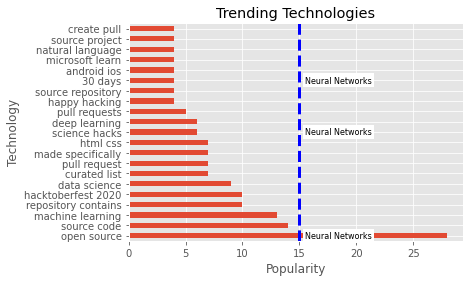

In [52]:
## plottting the frequency
plt.style.use("ggplot")

df.sort_values(by=[1], ascending=False).head(21).plot(kind="barh")

plt.title("Trending Technologies in 2020")
plt.ylabel("Technology")
plt.xlabel("Popularity")
plt.legend().set_visible(False)

plt.axvline(x=15, color="b", label="Average", linestyle="--", linewidth=3)
for custom in [0, 10, 15]:
    plt.text(15.5, custom, "Neural Networks", fontsize=8, va="center", bbox=dict(boxstyle="square", fc="white", ec="none"))
    
plt.show() 

#####  Trending Technologies in 2019

In [53]:
# convert clean descrpitons to list of tokens
list_doc = new_df19["clean"].apply(lambda x:x.split()).to_list()

## Anlaysis on docs
bigram_measures = nltk.collocations.BigramAssocMeasures()
bigram_finder = BigramCollocationFinder.from_documents(list_doc)

bigram_finder.apply_freq_filter(3)

bigrams = bigram_finder.nbest(bigram_measures.raw_freq, 20)
bigrams

[('deep', 'learning'),
 ('machine', 'learning'),
 ('open', 'source'),
 ('starter', 'code'),
 ('guided', 'project'),
 ('object', 'detection'),
 ('complete', 'flutter'),
 ('data', 'science'),
 ('github', 'actions'),
 ('best', 'practices'),
 ('jekyll', 'theme'),
 ('natural', 'language'),
 ('project', 'complete'),
 ('pytorch', 'implementation'),
 ('tensorflow', '2'),
 ('azure', 'devops'),
 ('development', 'bootcamp'),
 ('react', 'native'),
 ('code', 'used'),
 ('course', 'files')]

In [54]:
## scores by raw_freq
scores = bigram_finder.score_ngrams(bigram_measures.raw_freq)
scores[:10]

[(('deep', 'learning'), 0.0041942604856512146),
 (('machine', 'learning'), 0.003532008830022075),
 (('open', 'source'), 0.002869757174392936),
 (('starter', 'code'), 0.002869757174392936),
 (('guided', 'project'), 0.001986754966887417),
 (('object', 'detection'), 0.001986754966887417),
 (('complete', 'flutter'), 0.0017660044150110375),
 (('data', 'science'), 0.0017660044150110375),
 (('github', 'actions'), 0.0017660044150110375),
 (('best', 'practices'), 0.0013245033112582781)]

In [55]:
## Visualizing ngrams
# calculating no of occurences
ngram = list(bigram_finder.ngram_fd.items())
ngram.sort(key=lambda item:item[-1], reverse=True)

# creating tuples from ngram
frequency = [(" ".join(k), v) for k,v in ngram]

df = pd.DataFrame(frequency)
df.set_index([0], inplace=True)
df.head()

,1
0,
deep learning,19
machine learning,16
starter code,13
open source,13
guided project,9


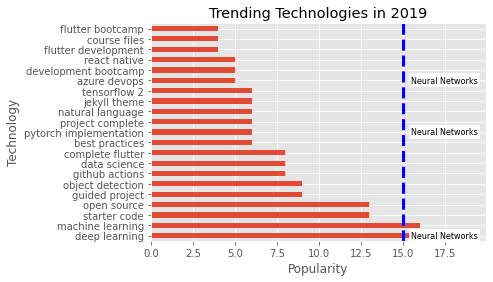

In [56]:
## plottting the frequency
plt.style.use("ggplot")

df.sort_values(by=[1], ascending=False).head(21).plot(kind="barh")

plt.title("Trending Technologies in 2019")
plt.ylabel("Technology")
plt.xlabel("Popularity")
plt.legend().set_visible(False)

plt.axvline(x=15, color="b", label="Average", linestyle="--", linewidth=3)
for custom in [0, 10, 15]:
    plt.text(15.5, custom, "Neural Networks", fontsize=8, va="center", bbox=dict(boxstyle="square", fc="white", ec="none"))
    
plt.show() 

In [ ]:
# --- others methods to find scores ---
## scores by pmi
# scores_pmi = bigram_finder.score_ngrams(bigram_measures.pmi)
# scores_pmi[:10]

## scores by student_t
# scores_st = bigram_finder.score_ngrams(bigram_measures.student_t)
# scores_st[:10]

## scores by chi-sq
# scores_chi_sq = bigram_finder.score_ngrams(bigram_measures.chi_sq)
# scores_chi_sq[:10]

## Programming languages

In [ ]:
## paginating github for data
results=[]
qs =["created:>2020-01-01", "created:>2019-01-01", "created:>2018-01-01"]

for q in qs:
    search_repo_paging(q)

In [ ]:
## for mutltiple years 
# new_df["year"] = new_df["created_at"].apply(lambda x:x.split("T")[0].split("-")[0])

In [ ]:
# print(f"Data count each year\n2020: {(new_df['year'] == '2020').sum()}\n2019: {(new_df['year'] == '2019').sum()}\n2018: {(new_df['year'] == '2018').sum()}")